In [1]:
%load_ext autoreload
%autoreload 2

import json
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# open store/results.json
with open('store/results.json', 'r') as f:
    results = json.load(f)
len(results.keys())

14

In [3]:
df = pd.DataFrame.from_dict(results, orient='index')
df

,train,save_name,wandb_run,model_id,hf_cache_dir,debug,model_max_length,preprocessed_dir,dataset_name,dataset_is_bigbench,...,seed,num_beams,reward_succesful_explanations,allow_answer_at_eos,lora_r,lora_alpha,lora_dropout,lora_bias,accuracy,loss
bloom560m_arithmetic_nshot0_base,False,bloom560m_arithmetic_nshot0_base,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.000000,0.0
bloom560m_arithmetic_nshot0_step,False,bloom560m_arithmetic_nshot0_step,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.000000,0.0
bloom560m_arithmetic_nshot1_noexpl,False,bloom560m_arithmetic_nshot1_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.024793,0.0
bloom560m_arithmetic_nshot2_noexpl,False,bloom560m_arithmetic_nshot2_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.404959,0.0
bloom560m_arithmetic_nshot3_noexpl,False,bloom560m_arithmetic_nshot3_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.413223,0.0
bloom560m_arithmetic_nshot4_noexpl,False,bloom560m_arithmetic_nshot4_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.388430,0.0
bloom560m_nli_nshot2_noexpl,False,bloom560m_nli_nshot2_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,1015,/project/gpuuva021/shared/cot/data/preprocessed,presuppositions_as_nli,True,...,666,None,False,False,8,32,0.05,none,0.485876,0.0
bloom560m_arithmetic_nshot5_noexpl,False,bloom560m_arithmetic_nshot5_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,512,/project/gpuuva021/shared/cot/data/preprocessed,arithmetic,True,...,666,None,False,False,8,32,0.05,none,0.132231,0.0
bloom560m_nli_nshot3_noexpl,False,bloom560m_nli_nshot3_noexpl,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,1015,/project/gpuuva021/shared/cot/data/preprocessed,presuppositions_as_nli,True,...,666,None,False,False,8,32,0.05,none,0.305085,0.0
bloom560m_nli_nshot0_base,False,bloom560m_nli_nshot0_base,None,bigscience/bloom-560m,/project/gpuuva021/shared/cot/hf_cache,False,1015,/project/gpuuva021/shared/cot/data/preprocessed,presuppositions_as_nli,True,...,666,None,False,False,8,32,0.05,none,0.000000,0.0


In [4]:
data = {'arithmetic' : {}, 'presuppositions_as_nli' : {}}

cols = {
    0 : {'n_shot' : 0, 'step_by_step' : False, 'no_explanation' : False, 'desc': '0'},
    1 : {'n_shot' : 0, 'step_by_step' : True, 'no_explanation'  : False, 'desc': '0\n"Step-by-step"'},
    2 : {'n_shot' : 1, 'step_by_step' : False, 'no_explanation' : True,  'desc': '1'},
    3 : {'n_shot' : 2, 'step_by_step' : False, 'no_explanation' : True,  'desc': '2'},
    4 : {'n_shot' : 3, 'step_by_step' : False, 'no_explanation' : True,  'desc': '3'},
    5 : {'n_shot' : 4, 'step_by_step' : False, 'no_explanation' : True,  'desc': '4'},
    6 : {'n_shot' : 5, 'step_by_step' : False, 'no_explanation' : True,  'desc': '5'},
}

for k, col in cols.items():
    df_mode_acc =  df[(df['n_shot'] == col['n_shot']) & (df['step_by_step'] == col['step_by_step']) & (df['no_explanation'] == col['no_explanation'])][['model_id',  'accuracy', 'dataset_name']]

    for dataset_name in df_mode_acc['dataset_name'].unique():

        a = df_mode_acc[df_mode_acc['dataset_name'] == dataset_name]

        data[dataset_name][k] = df_mode_acc[df_mode_acc['dataset_name'] == dataset_name].set_index('model_id').to_dict()['accuracy']


In [5]:
a.set_index('model_id')

,accuracy,dataset_name
model_id,,
bigscience/bloom-560m,0.497175,presuppositions_as_nli


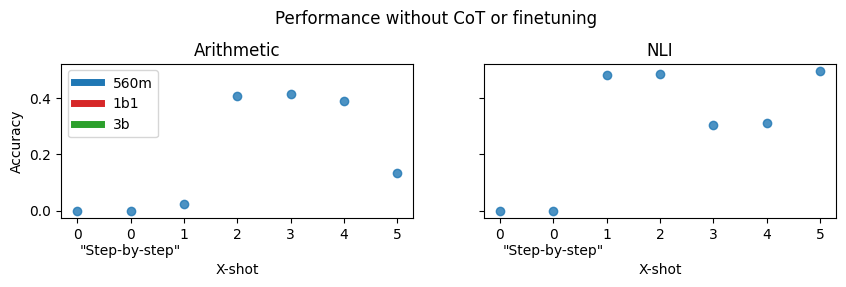

In [6]:
colors = {'bigscience/bloom-560m':'tab:blue', 'bigscience/bloom-1b1':'tab:red', 'bigscience/bloom-3b':'tab:green',}
shapes = {'bigscience/bloom-560m':'o', 'bigscience/bloom-1b1':'x', 'bigscience/bloom-3b':'s',}
tasks = {'arithmetic' : 'Arithmetic', 'presuppositions_as_nli' : 'NLI'}

handles = [
    Line2D([0], [0], color=color, lw=5, label=label.split('-')[-1]) for label, color in colors.items()
]

fig, axs = plt.subplots(1, len(data), figsize=(5*len(data), 2), sharey=True, sharex=True)

for (task, data_task), ax in zip(data.items(), axs):

    for k, d in data_task.items():
        vals = list(d.values())
        keys = list(d.keys())
        x = [k] * len(vals)

        for i, (val, key) in enumerate(zip(vals, keys)):
            ax.plot(k, [val], marker = shapes[key] , color = colors[key], alpha=0.8)
        # ax.scatter(x, vals, c = [colors[k] for k in keys], alpha=0.5)

    ax.set_xticks(list(range(len(cols))))
    ax.set_xticklabels([v['desc'] for v in cols.values()])
    ax.set_xlabel('X-shot')
    ax.set_title(tasks[task])

axs[0].set_ylabel('Accuracy')
axs[0].legend(handles = handles, loc = 'upper left')

fig.suptitle('Performance without CoT or finetuning', y = 1.15)
plt.show()
